<a href="https://colab.research.google.com/github/padobrik/kidney-pathology-classification/blob/main/kidney_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
! kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

 98% 1.49G/1.52G [00:10<00:00, 137MB/s]
100% 1.52G/1.52G [00:10<00:00, 157MB/s]


In [ ]:
import os
os.listdir('content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['Normal', 'Cyst', 'Stone', 'Tumor']

In [ ]:
path_main = 'content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

for folder in os.listdir(path_main):
  list_of_elements = os.listdir(os.path.join(path_main, folder))
  print(f'Folder: {folder}\n')
  print(f'Number of elements: {len(list_of_elements)}\n')
  print('**********')

Folder: Normal

Number of elements: 5077

**********
Folder: Cyst

Number of elements: 3709

**********
Folder: Stone

Number of elements: 1377

**********
Folder: Tumor

Number of elements: 2283

**********


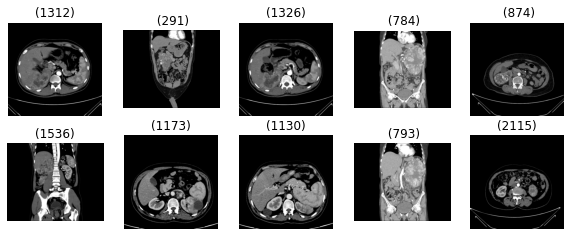

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

def plot_images(item_dir, num=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs[:num]]

  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx + 1)
    img = plt.imread(img_path)
    plt.title(f'{img_path}'[-10 : -4])
    plt.axis('off')
    plt.imshow(img)
    plt.savefig('samples.tiff')

path_tumor = f'{path_main}/Tumor'
path_cyst = f'{path_main}/Cyst'
path_stone = f'{path_main}/Stone'
path_normal = f'{path_main}/Normal'

plot_images(path_tumor, 10)

In [ ]:
import pandas as pd

data_path = 'content/kidneyData.csv'
data = pd.read_csv(data_path, header=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [ ]:
data.Class.unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [ ]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
from keras.preprocessing.image import ImageDataGenerator


splitfolders.ratio(path_main, 
                   output='./dataset', 
                   seed=14, 
                   ratio = (0.70, 0.15, 0.15))

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size = (200, 200),
                                                  color_mode = 'grayscale',
                                                  class_mode = 'categorical',
                                                  batch_size = 100)
test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size = (200, 200),
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical',
                                                batch_size = 100)
valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                target_size = (200, 200),
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical',
                                                batch_size = 100)

Copying files: 12446 files [00:13, 910.18 files/s]


Found 8710 images belonging to 4 classes.
Found 1871 images belonging to 4 classes.
Found 1865 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, LeakyReLU

model = Sequential() #create backbone of the model

model.add(Conv2D(32, (3,3), activation=LeakyReLU(), input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation=LeakyReLU()))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation=LeakyReLU()))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation=LeakyReLU()))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation=LeakyReLU()))
model.add(MaxPool2D(2))

model.add(Conv2D(256, (3,3), activation=LeakyReLU()))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(512, activation=LeakyReLU()))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)      

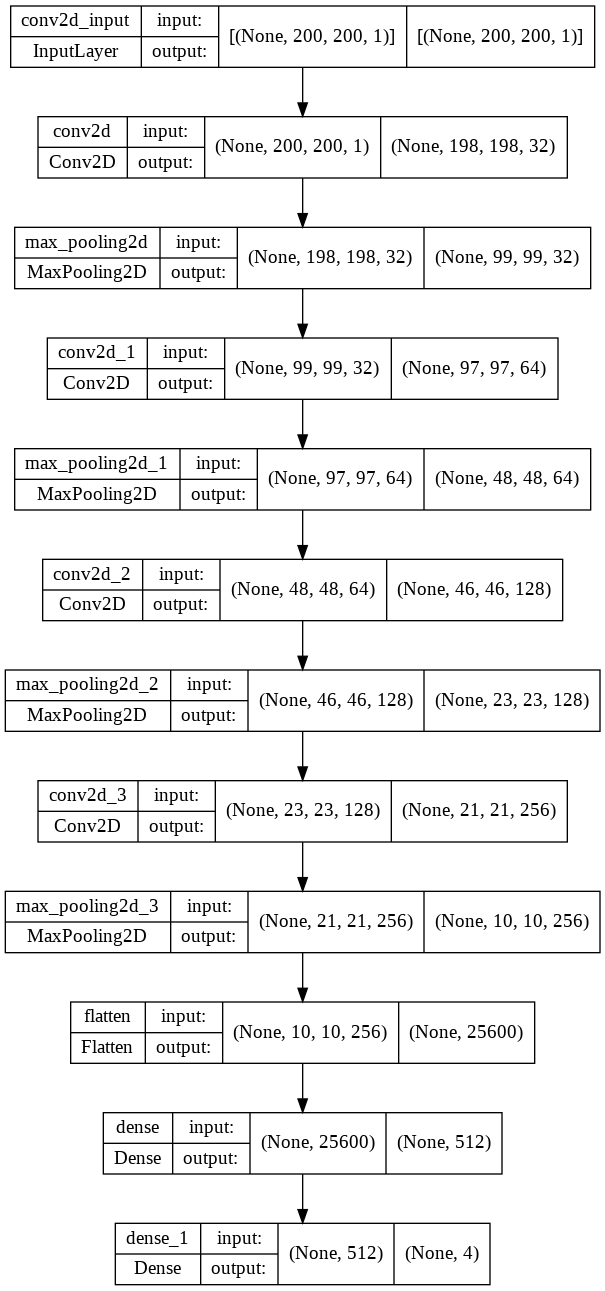

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='architecture.png', show_shapes=True)

In [ ]:
import keras

m = ['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=m)
train_model = model.fit(train_dataset, validation_data=valid_dataset, epochs=10)

Epoch 1/10
88/88 [==============================] - 655s 7s/step - loss: 1.1683 - accuracy: 0.5333 - precision: 0.6350 - recall: 0.2982 - val_loss: 1.1696 - val_accuracy: 0.5625 - val_precision: 0.6145 - val_recall: 0.4590
Epoch 2/10
88/88 [==============================] - 644s 7s/step - loss: 0.7165 - accuracy: 0.7251 - precision: 0.7860 - recall: 0.6424 - val_loss: 0.2651 - val_accuracy: 0.9072 - val_precision: 0.9236 - val_recall: 0.8885


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, LeakyReLU

model = Sequential() #create backbone of the model

model.add(Conv2D(32, (3,3), activation='elu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='elu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='elu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='elu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='elu'))
model.add(MaxPool2D(2))

model.add(Conv2D(256, (3,3), activation='elu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(512, activation='elu'))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 64)      

In [ ]:
import keras

m = ['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=m)
train_model = model.fit(train_dataset, validation_data=valid_dataset, epochs=10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, LeakyReLU

model = Sequential() #create backbone of the model

model.add(Conv2D(32, (3,3), activation='selu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='selu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='selu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='selu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='selu'))
model.add(MaxPool2D(2))

model.add(Conv2D(256, (3,3), activation='selu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(512, activation='selu'))

model.add(Dense(4, activation='softmax'))

model.summary()

In [ ]:
import keras

m = ['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=m)
train_model = model.fit(train_dataset, validation_data=valid_dataset, epochs=10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, LeakyReLU

model = Sequential() #create backbone of the model

model.add(Conv2D(32, (3,3), activation='gelu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='gelu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='gelu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='gelu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='gelu'))
model.add(MaxPool2D(2))

model.add(Conv2D(256, (3,3), activation='gelu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(512, activation='gelu'))

model.add(Dense(4, activation='softmax'))

model.summary()